# Importando as Bibliotecas

In [1]:
#Importando as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVC

# Importando o dataset de Câncer de mama

In [2]:
import pandas as pd
dataCancer = pd.read_csv("breast-cancer.csv")
dataCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,1799.0,1038.0,122.8,1001.0,1184.0,2776,3001,1471,...,2538.0,1733.0,184.6,2019.0,1622,6656.0,7119.0,2654,4601.0,1189
1,842517,0,2057.0,1777.0,132.9,1326.0,8474.0,7864,869,7017,...,2499.0,2341.0,158.8,1956.0,1238,1866.0,2416.0,186,275.0,8902
2,84300903,0,1969.0,2125.0,130.0,1203.0,1096.0,1599,1974,1279,...,2357.0,2553.0,152.5,1709.0,1444,4245.0,4504.0,243,3613.0,8758
3,84348301,0,1142.0,2038.0,7758.0,386.1,1425.0,2839,2414,1052,...,1491.0,26.5,9887.0,567.7,2098,8663.0,6869.0,2575,6638.0,173
4,84358402,0,2029.0,1434.0,135.1,1297.0,1003.0,1328,198,1043,...,2254.0,1667.0,152.2,1575.0,1374,205.0,0.4,1625,2364.0,7678


In [3]:
dataCancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,1799.0,1038.0,122.8,1001.0,1184.0,2776,3001,1471,...,2538.0,1733.0,184.6,2019.0,1622,6656.0,7119.0,2654,4601.0,1189
1,842517,0,2057.0,1777.0,132.9,1326.0,8474.0,7864,869,7017,...,2499.0,2341.0,158.8,1956.0,1238,1866.0,2416.0,186,275.0,8902
2,84300903,0,1969.0,2125.0,130.0,1203.0,1096.0,1599,1974,1279,...,2357.0,2553.0,152.5,1709.0,1444,4245.0,4504.0,243,3613.0,8758
3,84348301,0,1142.0,2038.0,7758.0,386.1,1425.0,2839,2414,1052,...,1491.0,26.5,9887.0,567.7,2098,8663.0,6869.0,2575,6638.0,173
4,84358402,0,2029.0,1434.0,135.1,1297.0,1003.0,1328,198,1043,...,2254.0,1667.0,152.2,1575.0,1374,205.0,0.4,1625,2364.0,7678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,2156.0,2239.0,142.0,1479.0,111.0,1159,2439,1389,...,2545.0,26.4,166.1,2027.0,141,2113.0,4107.0,2216,206.0,7115
565,926682,0,2013.0,2825.0,131.2,1261.0,978.0,1034,144,9791,...,2369.0,3825.0,155.0,1731.0,1166,1922.0,3215.0,1628,2572.0,6637
566,926954,0,16.6,2808.0,108.3,858.1,8455.0,1023,9251,5302,...,1898.0,3412.0,126.7,1124.0,1139,3094.0,3403.0,1418,2218.0,782
567,927241,0,20.6,2933.0,140.1,1265.0,1178.0,277,3514,152,...,2574.0,3942.0,184.6,1821.0,165,8681.0,9387.0,265,4087.0,124


# Encontrando informações do Dataset

In [4]:
dataCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    int64  
 8   concavity_mean           569 non-null    int64  
 9   concave points_mean      569 non-null    int64  
 10  symmetry_mean            569 non-null    int64  
 11  fractal_dimension_mean   569 non-null    int64  
 12  radius_se                569 non-null    int64  
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataCancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
dataCancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
dataCancer.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,1877.445518,1759.742707,5203.72355,654.889104,5377.935149,3980.750439,3182.627417,3688.309315,...,1743.423902,2309.869947,4044.647803,880.583128,1805.435852,3057.959754,3342.862214,3522.813708,2580.325659,6252.123023
std,1.250206e+08,0.483918,2167.649998,688.108749,3833.16871,351.914129,3913.076000,2988.912750,2539.018050,2807.699479,...,1543.230448,996.915470,4159.611511,569.356993,2096.251655,2246.823910,2387.607842,2925.740804,1042.838192,2974.589232
min,8.670000e+03,0.000000,9.000000,13.100000,59.20000,143.500000,0.100000,6.000000,0.000000,0.000000,...,10.600000,14.100000,59.900000,185.200000,13.000000,0.100000,0.000000,0.000000,0.300000,12.000000
25%,8.692180e+05,0.000000,1154.000000,1518.000000,129.50000,420.300000,1071.000000,1289.000000,1357.000000,1471.000000,...,1247.000000,1949.000000,121.400000,515.300000,1166.000000,1574.000000,1521.000000,1339.000000,2355.000000,6037.000000
50%,9.060240e+05,1.000000,1351.000000,1832.000000,7138.00000,551.100000,7721.000000,2839.000000,2367.000000,2799.000000,...,1485.000000,2462.000000,195.000000,686.500000,1327.000000,2376.000000,2884.000000,2089.000000,2741.000000,7313.000000
75%,8.813129e+06,1.000000,1727.000000,2154.000000,8305.00000,782.700000,8946.000000,6698.000000,4479.000000,5736.000000,...,1928.000000,2926.000000,8411.000000,1084.000000,1494.000000,4002.000000,4704.000000,6136.000000,3113.000000,8194.000000
max,9.113205e+08,1.000000,9904.000000,3928.000000,9958.00000,2501.000000,9997.000000,9965.000000,9966.000000,9961.000000,...,9981.000000,4954.000000,9971.000000,4254.000000,9994.000000,9995.000000,9996.000000,9993.000000,6638.000000,9981.000000


# Plotando um Gráfico

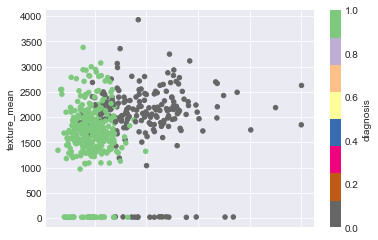

In [8]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-darkgrid")
dataCancer.plot(x='area_mean', y='texture_mean', c='diagnosis', kind='scatter', colormap='Accent_r')

In [9]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

# Separando amostras de treinamento e teste

In [15]:
colunas_x = [ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [18]:
## Normalizando os dados das features
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
dataCancer[colunas_x] = scaler_x.fit_transform(dataCancer[colunas_x])

In [21]:
## Normalizando os dados do previsor
from sklearn.preprocessing import MinMaxScaler
scaler_y = MinMaxScaler()
dataCancer[['diagnosis']] = scaler_y.fit_transform(dataCancer[['diagnosis']])

In [22]:
#Separando preditores e a classe
X = dataCancer.values[:, 2:31]
Y = dataCancer.values[:,1]

In [23]:
X

array([[1.80899444e-01, 2.61794682e-01, 6.42502121e-03, ...,
        7.12184874e-01, 2.65585910e-01, 6.93116592e-01],
       [2.06973219e-01, 4.50560678e-01, 7.44534691e-03, ...,
        2.41696679e-01, 1.86130291e-02, 4.13848170e-02],
       [1.98079838e-01, 5.39451838e-01, 7.15238211e-03, ...,
        4.50580232e-01, 2.43170219e-02, 5.44269853e-01],
       ...,
       [7.68064679e-04, 7.13913510e-01, 4.96019720e-03, ...,
        3.40436174e-01, 1.41899330e-01, 3.34106694e-01],
       [1.17230925e-03, 7.45842806e-01, 8.17270780e-03, ...,
        9.39075630e-01, 2.65185630e-02, 6.15680130e-01],
       [7.75138959e-02, 6.23489744e-01, 4.78118560e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.32484144e-01]])

In [24]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)

# Aplicando o Algoritmo SVM com gamma 'auto'

In [26]:
clf_rbf = SVC(gamma='auto', kernel='rbf')
clf_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
clf_linear = SVC(gamma='auto', kernel='linear')
clf_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
clf_polynomial = SVC(gamma='auto', kernel='poly')
clf_polynomial.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Aplicando o Algoritmo SVM com gamma '0.1'

In [29]:
clf_rbf_gamma = SVC(gamma=0.1, kernel='rbf')
clf_rbf_gamma.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
clf_linear_gamma = SVC(gamma=0.1, kernel='linear')
clf_linear_gamma.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
clf_polynomial_gamma = SVC(gamma=0.1, kernel='poly')
clf_polynomial_gamma.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predizendo com as amostras de teste

In [32]:
# Kernel rbf
y_pred_rbf = clf_rbf.predict(X_test)
y_pred_rbf

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1.])

In [33]:
# Kernel Polynomial
y_pred_poly = clf_polynomial.predict(X_test)
y_pred_poly

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [34]:
# Kernel Linear
y_pred_linear = clf_linear.predict(X_test)
y_pred_linear

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1.])

In [35]:
# Kernel rbf com gamma 0.1
y_pred_rbf_gamma = clf_rbf_gamma.predict(X_test)
y_pred_rbf_gamma

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1.])

In [36]:
# Kernel Polynomial com gamma 0.1
y_pred_poly_gamma = clf_polynomial_gamma.predict(X_test)
y_pred_poly_gamma

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1.])

In [37]:
# Kernel Linear
y_pred_linear_gamma = clf_linear_gamma.predict(X_test)
y_pred_linear_gamma

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1.])

# Calculando Acurácia

In [38]:
#Acurácia com o kernel rbf
print ("Acurácia foi ", accuracy_score(y_test,y_pred_rbf)*100)

Acurácia foi  91.81286549707602


In [44]:
#Acurácia com o kernel polynomial
print ("Acurácia foi ", accuracy_score(y_test,y_pred_poly)*100)

Acurácia foi  60.23391812865497


In [45]:
#Acurácia com o kernel linear
print ("Acurácia foi ", accuracy_score(y_test,y_pred_linear)*100)

Acurácia foi  93.56725146198829


In [46]:
#Acurácia com o kernel rbf com gamma 0.1
print ("Acurácia foi ", accuracy_score(y_test,y_pred_rbf_gamma)*100)

Acurácia foi  92.98245614035088


In [47]:
#Acurácia com o kernel polynomial com gamma 0.1
print ("Acurácia foi ", accuracy_score(y_test,y_pred_poly_gamma)*100)

Acurácia foi  92.39766081871345


In [48]:
#Acurácia com o kernel linear com gamma 0.1
print ("Acurácia foi ", accuracy_score(y_test,y_pred_linear_gamma)*100)

Acurácia foi  93.56725146198829
